In [1]:
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd

# **What is Web Scraping?**
  *Web Scraping is a powerful tool of collecting and parsing the raw data from the web.Even copying and pasting the lyrics of your favorite song is a form of web scraping!.*  

# **Reasons for Web Scraping**
 *There’s a job site that offers precisely the kinds of jobs you want Unfortunately, a new position only pops up once in a blue moon, and the site doesn’t provide an email notification service. You think about checking up on it every day, but that doesn’t sound like the most fun and productive way to spend your time.*
 *To solve this problem, Automated web scraping can be a solution to speed up the data collection process. You write your code once, and it will get the information you want many times and from many pages.*

# **Challenges of Web Scraper**
## **Variety:** 
***Every website is different. While you’ll encounter general structures that repeat themselves, each website is unique and will need personal treatment if you want to extract the relevant information.***

## **Durability:** 
***Websites constantly change. Say you’ve built a shiny new web scraper that automatically cherry-picks what you want from your resource of interest. The first time you run your script, it works flawlessly.***

# **Problems faces to Scarp the data**
*In sometimes, when users make http request from websites. These websites don't accept this request and generate an acess denied response. To solve this problem, We show that this request has generated by the browser.* 

# **BeautifulSoap**
*Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.*

In [4]:
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1').text
webpage

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;cc1c2117&#46;1679730452&#46;cdfb711\n</BODY>\n</HTML>\n'

In [6]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers=headers).text

In [13]:
#Also passing the html parser
soupage=BeautifulSoup(webpage, 'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 800.1k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/
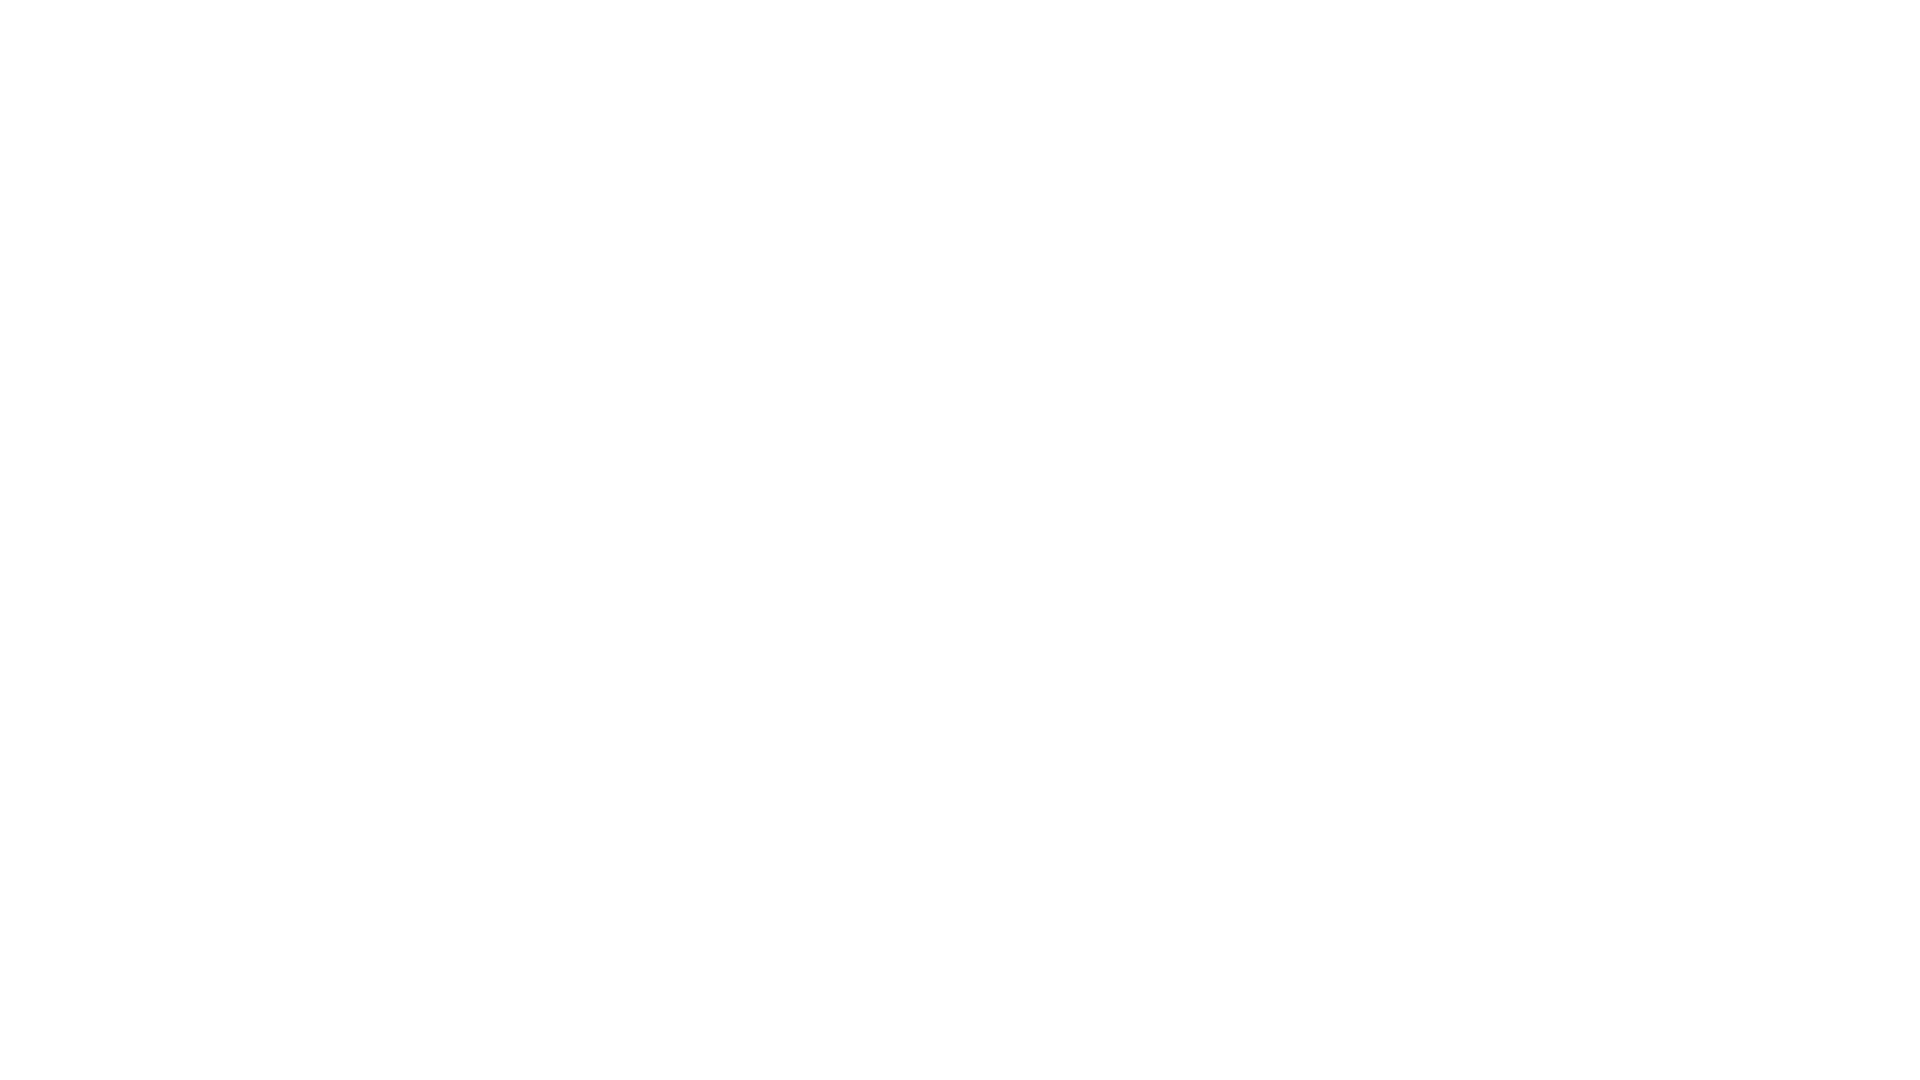

In [16]:
##format all the code of html using html pretify
print(soupage.prettify())

In [28]:
#now find all the tags of the h1
tag=soupage.find_all('h1')
tag[0].text

'List of companies in India'

In [30]:
len(soupage.find_all('h2'))

30

In [43]:
#to remove the space use the strip function
#These are the name of the companies
tag1=soupage.find_all('h2')
for i in tag1:
 print(i.text.strip()) 

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance Jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
BYJU'S
Bharti Airtel
Tata Motors
Flipkart
WNS
IndusInd Bank


In [45]:
#now find the ratings 
len(soupage.find_all('p', class_='rating'))

30

In [49]:
##now find the reviews 
len(soupage.find_all('a', class_='review-count'))

30

In [54]:
company=soupage.find_all('div', class_='company-content-wrapper')

In [97]:
#find the h2 in a specific div 
name=[]
rating=[]
reviews_cout=[]
ctype=[]
htype=[]
old=[]
employee=[]
for i in company: 
 name.append(i.find('h2').text.strip())
 rating.append(i.find_all('p', class_='rating')[0].text.strip())
 reviews_cout.append(i.find('a', class_='review-count').text.strip())
 ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
 htype.append(i.find_all('p', class_='infoEntity')[1].text.strip())
 old.append(i.find_all('p', class_='infoEntity')[2].text.strip())
 employee.append(i.find_all('p', class_='infoEntity')[3].text.strip())

In [63]:
name

['TCS',
 'Accenture',
 'Cognizant',
 'ICICI Bank',
 'HDFC Bank',
 'Wipro',
 'Infosys',
 'Capgemini',
 'Tech Mahindra',
 'Genpact',
 'HCLTech',
 'Amazon',
 'Axis Bank',
 'IBM',
 'Concentrix Corpo...',
 'Reliance Jio',
 'Larsen & Toubro ...',
 'HDB Financial Se...',
 'Vodafone Idea',
 'Teleperformance',
 'Reliance Retail',
 'Kotak Mahindra B...',
 'Deloitte',
 'Reliance Industr...',
 "BYJU'S",
 'Bharti Airtel',
 'Tata Motors',
 'Flipkart',
 'WNS',
 'IndusInd Bank']

In [75]:
rating

['3.9',
 '4.1',
 '3.9',
 '4.1',
 '4.0',
 '3.9',
 '3.9',
 '3.9',
 '3.7',
 '4.0',
 '3.8',
 '4.2',
 '3.9',
 '4.1',
 '4.0',
 '4.1',
 '4.0',
 '4.0',
 '4.2',
 '3.6',
 '4.2',
 '3.9',
 '4.1',
 '4.1',
 '3.3',
 '4.1',
 '4.2',
 '4.2',
 '3.7',
 '3.8']

In [79]:
reviews_cout

[[<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/tcs-reviews">
  									(53.3k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/accenture-reviews">
  									(34.5k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/cognizant-reviews">
  									(31.6k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/icici-bank-reviews">
  									(25.8k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/hdfc-bank-reviews">
  									(25k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/wipro-reviews">
  									(24.9k Reviews)
  								</a>],
 [<a class="review-count sbold-Labels" href="https://www.ambitionbox.com/reviews/infosys-reviews">
  									(23.6k Reviews)
  								</a>]

In [81]:
reviews_cout

['(53.3k Reviews)',
 '(34.5k Reviews)',
 '(31.6k Reviews)',
 '(25.8k Reviews)',
 '(25k Reviews)',
 '(24.9k Reviews)',
 '(23.6k Reviews)',
 '(21.7k Reviews)',
 '(20.5k Reviews)',
 '(19.8k Reviews)',
 '(19k Reviews)',
 '(18.4k Reviews)',
 '(17k Reviews)',
 '(15.9k Reviews)',
 '(15.9k Reviews)',
 '(15.6k Reviews)',
 '(15k Reviews)',
 '(14.1k Reviews)',
 '(13.4k Reviews)',
 '(12.3k Reviews)',
 '(11.5k Reviews)',
 '(10.7k Reviews)',
 '(10.1k Reviews)',
 '(10k Reviews)',
 '(9.7k Reviews)',
 '(9.6k Reviews)',
 '(9k Reviews)',
 '(7.6k Reviews)',
 '(7.3k Reviews)',
 '(7.1k Reviews)']

In [91]:
company[0].find_all('p', class_='infoEntity')[3].text.strip()

'1 Lakh+ Employees (India)'

In [98]:
ctype

['Public',
 'Public',
 'Private',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Public',
 'Private',
 'Public',
 'Private',
 'Private',
 'Public',
 'Private',
 'Public',
 'Private',
 'Public',
 'Public',
 'Public',
 'Private',
 'Public']

In [99]:
employee

['1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '50k-1 Lakh Employees (India)',
 '50k-1 Lakh Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '50k-1 Lakh Employees (India)',
 '1 Lakh+ Employees (India)',
 '10k-50k Employees (India)',
 '50k-1 Lakh Employees (India)',
 '1 Lakh+ Employees (India)',
 '1 Lakh+ Employees (India)',
 '10k-50k Employees (India)',
 '50k-1 Lakh Employees (India)',
 '1 Lakh+ Employees (India)',
 '10k-50k Employees (India)',
 '50k-1 Lakh Employees (India)',
 '10k-50k Employees (India)',
 '1k-5k Employees (India)',
 '10k-50k Employees (India)',
 '50k-1 Lakh Employees (India)',
 '1k-5k Employees (India)',
 '10k-50k Employees (India)',
 '10k-50k Employees (India)']

In [106]:
dictionary={'Name': name, 'Rating': rating, 'Reviews': reviews_cout, 'Company': ctype, 'HeadQuater': htype, 'Old': old, 'Employee': employee}

In [108]:
import pandas as pd
df=pd.DataFrame(dictionary)

In [109]:
df

,Name,Rating,Reviews,Company,HeadQuater,Old,Employee
0,TCS,3.9,(53.3k Reviews),Public,"Mumbai,Maharashtra + 272 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(34.5k Reviews),Public,Dublin + 134 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(31.6k Reviews),Private,Teaneck. New Jersey. + 103 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.1,(25.8k Reviews),Public,"Mumbai,Maharashtra + 1090 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(25k Reviews),Public,"Mumbai,Maharashtra + 1308 more",29 years old,1 Lakh+ Employees (India)
5,Wipro,3.9,(24.9k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 227 more",78 years old,1 Lakh+ Employees (India)
6,Infosys,3.9,(23.6k Reviews),Public,"Bengaluru/Bangalore,Karnataka + 128 more",42 years old,1 Lakh+ Employees (India)
7,Capgemini,3.9,(21.7k Reviews),Public,Paris + 77 more,56 years old,1 Lakh+ Employees (India)
8,Tech Mahindra,3.7,(20.5k Reviews),Public,"Pune,Maharashtra + 214 more",37 years old,50k-1 Lakh Employees (India)
9,Genpact,4.0,(19.8k Reviews),Public,"New York,New York + 70 more",26 years old,50k-1 Lakh Employees (India)


In [110]:
df.shape

(30, 7)

# ***Create DataFrame for all the pages***


In [114]:
df1=pd.DataFrame()
company=soupage.find_all('div', class_='company-content-wrapper')
for i in range(1, 1001):
 headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
 webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(i), headers=headers).text
 soupage=BeautifulSoup(webpage, 'lxml')
 name=[] 
 rating=[]
 reviews_cout=[]
 ctype=[]
 htype=[]
 old=[]
 employee=[]
 for i in company: 
  try:
   name.append(i.find('h2').text.strip())
  except:
   name.append(np.nan)
  try:
   rating.append(i.find_all('p', class_='rating')[0].text.strip())
  except:
   rating.append(np.nan)
  try:
   reviews_cout.append(i.find('a', class_='review-count').text.strip())
  except:
   reviews_cout(np.nan)
  try:
   ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
  except:
   ctype.append(np.nan)
  try:
   htype.append(i.find_all('p', class_='infoEntity')[1].text.strip())
  except:
   htype.append(np.nan)
  try:
   old.append(i.find_all('p', class_='infoEntity')[2].text.strip())
  except:
   old.append(np.nan)
  try:
   employee.append(i.find_all('p', class_='infoEntity')[3].text.strip())
  except:
   employee.append(np.nan)
 df=pd.DataFrame({'Name': name, 'Rating': rating, 'Reviews': reviews_cout, 'Company': ctype, 'HeadQuater': htype, 'Old': old, 'Employee': employee})
 df1=df1.append(df, ignore_index=True)

<ipython-input-114-580683508862>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df, ignore_index=True)


In [115]:
df1.shape

(30000, 7)

In [116]:
df1.head()

,Name,Rating,Reviews,Company,HeadQuater,Old,Employee
0,Kyndryl,4.1,(907 Reviews),"New York,New York + 17 more",2 years old,50k-1 Lakh Employees (India),NaN
1,Relaxo Footwear,4.1,(907 Reviews),Public,"New Delhi,Delhi + 97 more",47 years old,1k-5k Employees (India)
2,ISS Facility Ser...,4.2,(905 Reviews),Private,Copenhagen + 46 more,18 years old,10k-50k Employees (India)
3,Capgemini Engine...,3.7,(905 Reviews),Gurgaon/Gurugram + 12 more,10k-50k Employees (India),NaN,NaN
4,Alstom Transport...,4.0,(904 Reviews),Private,Saint-Ouen + 33 more,95 years old,5k-10k Employees (India)


In [ ]:
df1.to_csv('/100 days of ml/CompanyJobsOffer_Ambitionbox_dataset.csv')

## *https://realpython.github.io/fake-jobs/ Scarp data from another website*.

In [7]:
response1=requests.get('https://realpython.github.io/fake-jobs/').text

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Fake Python</title>\n    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">\n  </head>\n  <body>\n  <section class="section">\n    <div class="container mb-5">\n      <h1 class="title is-1">\n        Fake Python\n      </h1>\n      <p class="subtitle is-3">\n        Fake Jobs for Your Web Scraping Journey\n      </p>\n    </div>\n    <div class="container">\n    <div id="ResultsContainer" class="columns is-multiline">\n    <div class="column is-half">\n<div class="card">\n  <div class="card-content">\n    <div class="media">\n      <div class="media-left">\n        <figure class="image is-48x48">\n          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">\n        </figure>\n      </div>\n      <div class="media-content"

In [11]:
mysoup=BeautifulSoup(response1, "html.parser")

In [14]:
print(mysoup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <h2 c

In [64]:
mi=mysoup.find_all('div', class_='column is-half')

In [45]:
len(mi)

100

In [96]:
job_title=[]
sub_title=[]
location=[]
Date=[]
for i in range(len(mi)):
 job_title.append(mi[i].find('h2', class_="title is-5").text.strip())
 sub_title.append(mi[i].find('h3', class_="subtitle is-6 company").text.strip())
 location.append(mi[i].find('p', class_="location").text.strip())
 v=mi[i].find('p' , class_='is-small has-text-grey')
 for i in v.findAll('time'):
  if i.has_attr('datetime'):
    Date.append(i['datetime'])

In [53]:
job_title

['Senior Python Developer',
 'Energy engineer',
 'Legal executive',
 'Fitness centre manager',
 'Product manager',
 'Medical technical officer',
 'Physiological scientist',
 'Textile designer',
 'Television floor manager',
 'Waste management officer',
 'Software Engineer (Python)',
 'Interpreter',
 'Architect',
 'Meteorologist',
 'Audiological scientist',
 'English as a second language teacher',
 'Surgeon',
 'Equities trader',
 'Newspaper journalist',
 'Materials engineer',
 'Python Programmer (Entry-Level)',
 'Product/process development scientist',
 'Scientist, research (maths)',
 'Ecologist',
 'Materials engineer',
 'Historic buildings inspector/conservation officer',
 'Data scientist',
 'Psychiatrist',
 'Structural engineer',
 'Immigration officer',
 'Python Programmer (Entry-Level)',
 'Neurosurgeon',
 'Broadcast engineer',
 'Make',
 'Nurse, adult',
 'Air broker',
 'Editor, film/video',
 'Production assistant, radio',
 'Engineer, communications',
 'Sales executive',
 'Software Deve

In [58]:
sub_title

['Payne, Roberts and Davis',
 'Vasquez-Davidson',
 'Jackson, Chambers and Levy',
 'Savage-Bradley',
 'Ramirez Inc',
 'Rogers-Yates',
 'Kramer-Klein',
 'Meyers-Johnson',
 'Hughes-Williams',
 'Jones, Williams and Villa',
 'Garcia PLC',
 'Gregory and Sons',
 'Clark, Garcia and Sosa',
 'Bush PLC',
 'Salazar-Meyers',
 'Parker, Murphy and Brooks',
 'Cruz-Brown',
 'Macdonald-Ferguson',
 'Williams, Peterson and Rojas',
 'Smith and Sons',
 'Moss, Duncan and Allen',
 'Gomez-Carroll',
 'Manning, Welch and Herring',
 'Lee, Gutierrez and Brown',
 'Davis, Serrano and Cook',
 'Smith LLC',
 'Thomas Group',
 'Silva-King',
 'Pierce-Long',
 'Walker-Simpson',
 'Cooper and Sons',
 'Donovan, Gonzalez and Figueroa',
 'Morgan, Butler and Bennett',
 'Snyder-Lee',
 'Harris PLC',
 'Washington PLC',
 'Brown, Price and Campbell',
 'Mcgee PLC',
 'Dixon Inc',
 'Thompson, Sheppard and Ward',
 'Adams-Brewer',
 'Schneider-Brady',
 'Gonzales-Frank',
 'Smith-Wong',
 'Pierce-Herrera',
 'Aguilar, Rivera and Quinn',
 'Lowe,

In [60]:
location

['Stewartbury, AA',
 'Christopherville, AA',
 'Port Ericaburgh, AA',
 'East Seanview, AP',
 'North Jamieview, AP',
 'Davidville, AP',
 'South Christopher, AE',
 'Port Jonathan, AE',
 'Osbornetown, AE',
 'Scotttown, AP',
 'Ericberg, AE',
 'Ramireztown, AE',
 'Figueroaview, AA',
 'Kelseystad, AA',
 'Williamsburgh, AE',
 'Mitchellburgh, AE',
 'West Jessicabury, AA',
 'Maloneshire, AE',
 'Johnsonton, AA',
 'South Davidtown, AP',
 'Port Sara, AE',
 'Marktown, AA',
 'Laurenland, AE',
 'Lauraton, AP',
 'South Tammyberg, AP',
 'North Brandonville, AP',
 'Port Robertfurt, AA',
 'Burnettbury, AE',
 'Herbertside, AA',
 'Christopherport, AP',
 'West Victor, AE',
 'Port Aaron, AP',
 'Loribury, AA',
 'Angelastad, AP',
 'Larrytown, AE',
 'West Colin, AP',
 'West Stephanie, AP',
 'Laurentown, AP',
 'Wrightberg, AP',
 'Alberttown, AE',
 'Brockburgh, AE',
 'North Jason, AE',
 'Arnoldhaven, AE',
 'Lake Destiny, AP',
 'South Timothyburgh, AP',
 'New Jimmyton, AE',
 'New Lucasbury, AP',
 'Port Cory, AE',
 

In [97]:
Date

['2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-08',
 '2021-04-

In [98]:
dict2={'Job-Type': job_title, 'Developers': sub_title, 'Location': location, 'Date': Date}

In [99]:
dict2

{'Job-Type': ['Senior Python Developer',
  'Energy engineer',
  'Legal executive',
  'Fitness centre manager',
  'Product manager',
  'Medical technical officer',
  'Physiological scientist',
  'Textile designer',
  'Television floor manager',
  'Waste management officer',
  'Software Engineer (Python)',
  'Interpreter',
  'Architect',
  'Meteorologist',
  'Audiological scientist',
  'English as a second language teacher',
  'Surgeon',
  'Equities trader',
  'Newspaper journalist',
  'Materials engineer',
  'Python Programmer (Entry-Level)',
  'Product/process development scientist',
  'Scientist, research (maths)',
  'Ecologist',
  'Materials engineer',
  'Historic buildings inspector/conservation officer',
  'Data scientist',
  'Psychiatrist',
  'Structural engineer',
  'Immigration officer',
  'Python Programmer (Entry-Level)',
  'Neurosurgeon',
  'Broadcast engineer',
  'Make',
  'Nurse, adult',
  'Air broker',
  'Editor, film/video',
  'Production assistant, radio',
  'Engineer, c

In [101]:
df3=pd.DataFrame(dict2)

In [102]:
df3.shape

(100, 4)

In [104]:
df3.head()

,Job-Type,Developers,Location,Date
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08


In [106]:
df3.to_csv('/100 days of ml/Developers_Hiring_Dataset.csv', index=False)